In [1]:
import mdtraj as md
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:

xtal_path = 'data/2agy_c36_state0.pdb'

Load the crystal structure to align to, I need to get rid of the crystal waters though. 

In [3]:
xtal = md.load(xtal_path)
xtal = xtal.atom_slice(xtal.top.select('not water'))

In [4]:
top, tab = xtal.top.to_dataframe()

In [6]:
top.resName.unique()

array(['ARG', 'GLU', 'VAL', 'LEU', 'THR', 'GLY', 'HIS', 'SER', 'ALA',
       'PRO', 'GLN', 'ASN', 'ILE', 'TYR', 'MET', 'ASP', 'PHE', 'LYS',
       'TRP', 'CYS', 'TTW'], dtype=object)

In [7]:
top.head()

,serial,name,element,resSeq,resName,chainID,segmentID
0,1,N,N,73,ARG,0,B
1,2,H,H,73,ARG,0,B
2,3,CA,C,73,ARG,0,B
3,4,HA,H,73,ARG,0,B
4,5,CB,C,73,ARG,0,B


In [10]:
top.loc[top.resName=='TTW', :].head()

,serial,name,element,resSeq,resName,chainID,segmentID
6078,6079,N,N,109,TTW,0,D
6079,6080,HN,H,109,TTW,0,D
6080,6081,CA,C,109,TTW,0,D
6081,6082,HA,H,109,TTW,0,D
6082,6083,CX1,C,109,TTW,0,D


In [27]:
as_d = list(top.loc[(top.resSeq.isin([82, 109, 84, 172, 128, 160])) & (top.segmentID=='D'), :].index)
as_h = list(top.loc[(top.resSeq.isin([82, 109, 84, 172, 128, 160])) & (top.segmentID=='H'), :].index)

In [26]:
as_d

Int64Index([5744, 5745, 5746, 5747, 5748, 5749, 5750, 5751, 5752, 5753,
            ...
            7050, 7051, 7052, 7053, 7054, 7055, 7056, 7057, 7058, 7059],
           dtype='int64', length=116)

In [29]:
df = pd.read_csv('outputs/rmsd_ca.csv')
df.head()

,rmsd,traj_idx
0,0.565979,1
1,0.552900,1
2,0.552800,1
3,0.570736,1
4,0.539465,1


In [34]:
df.groupby('traj_idx').count().values

array([[1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [   3],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [10

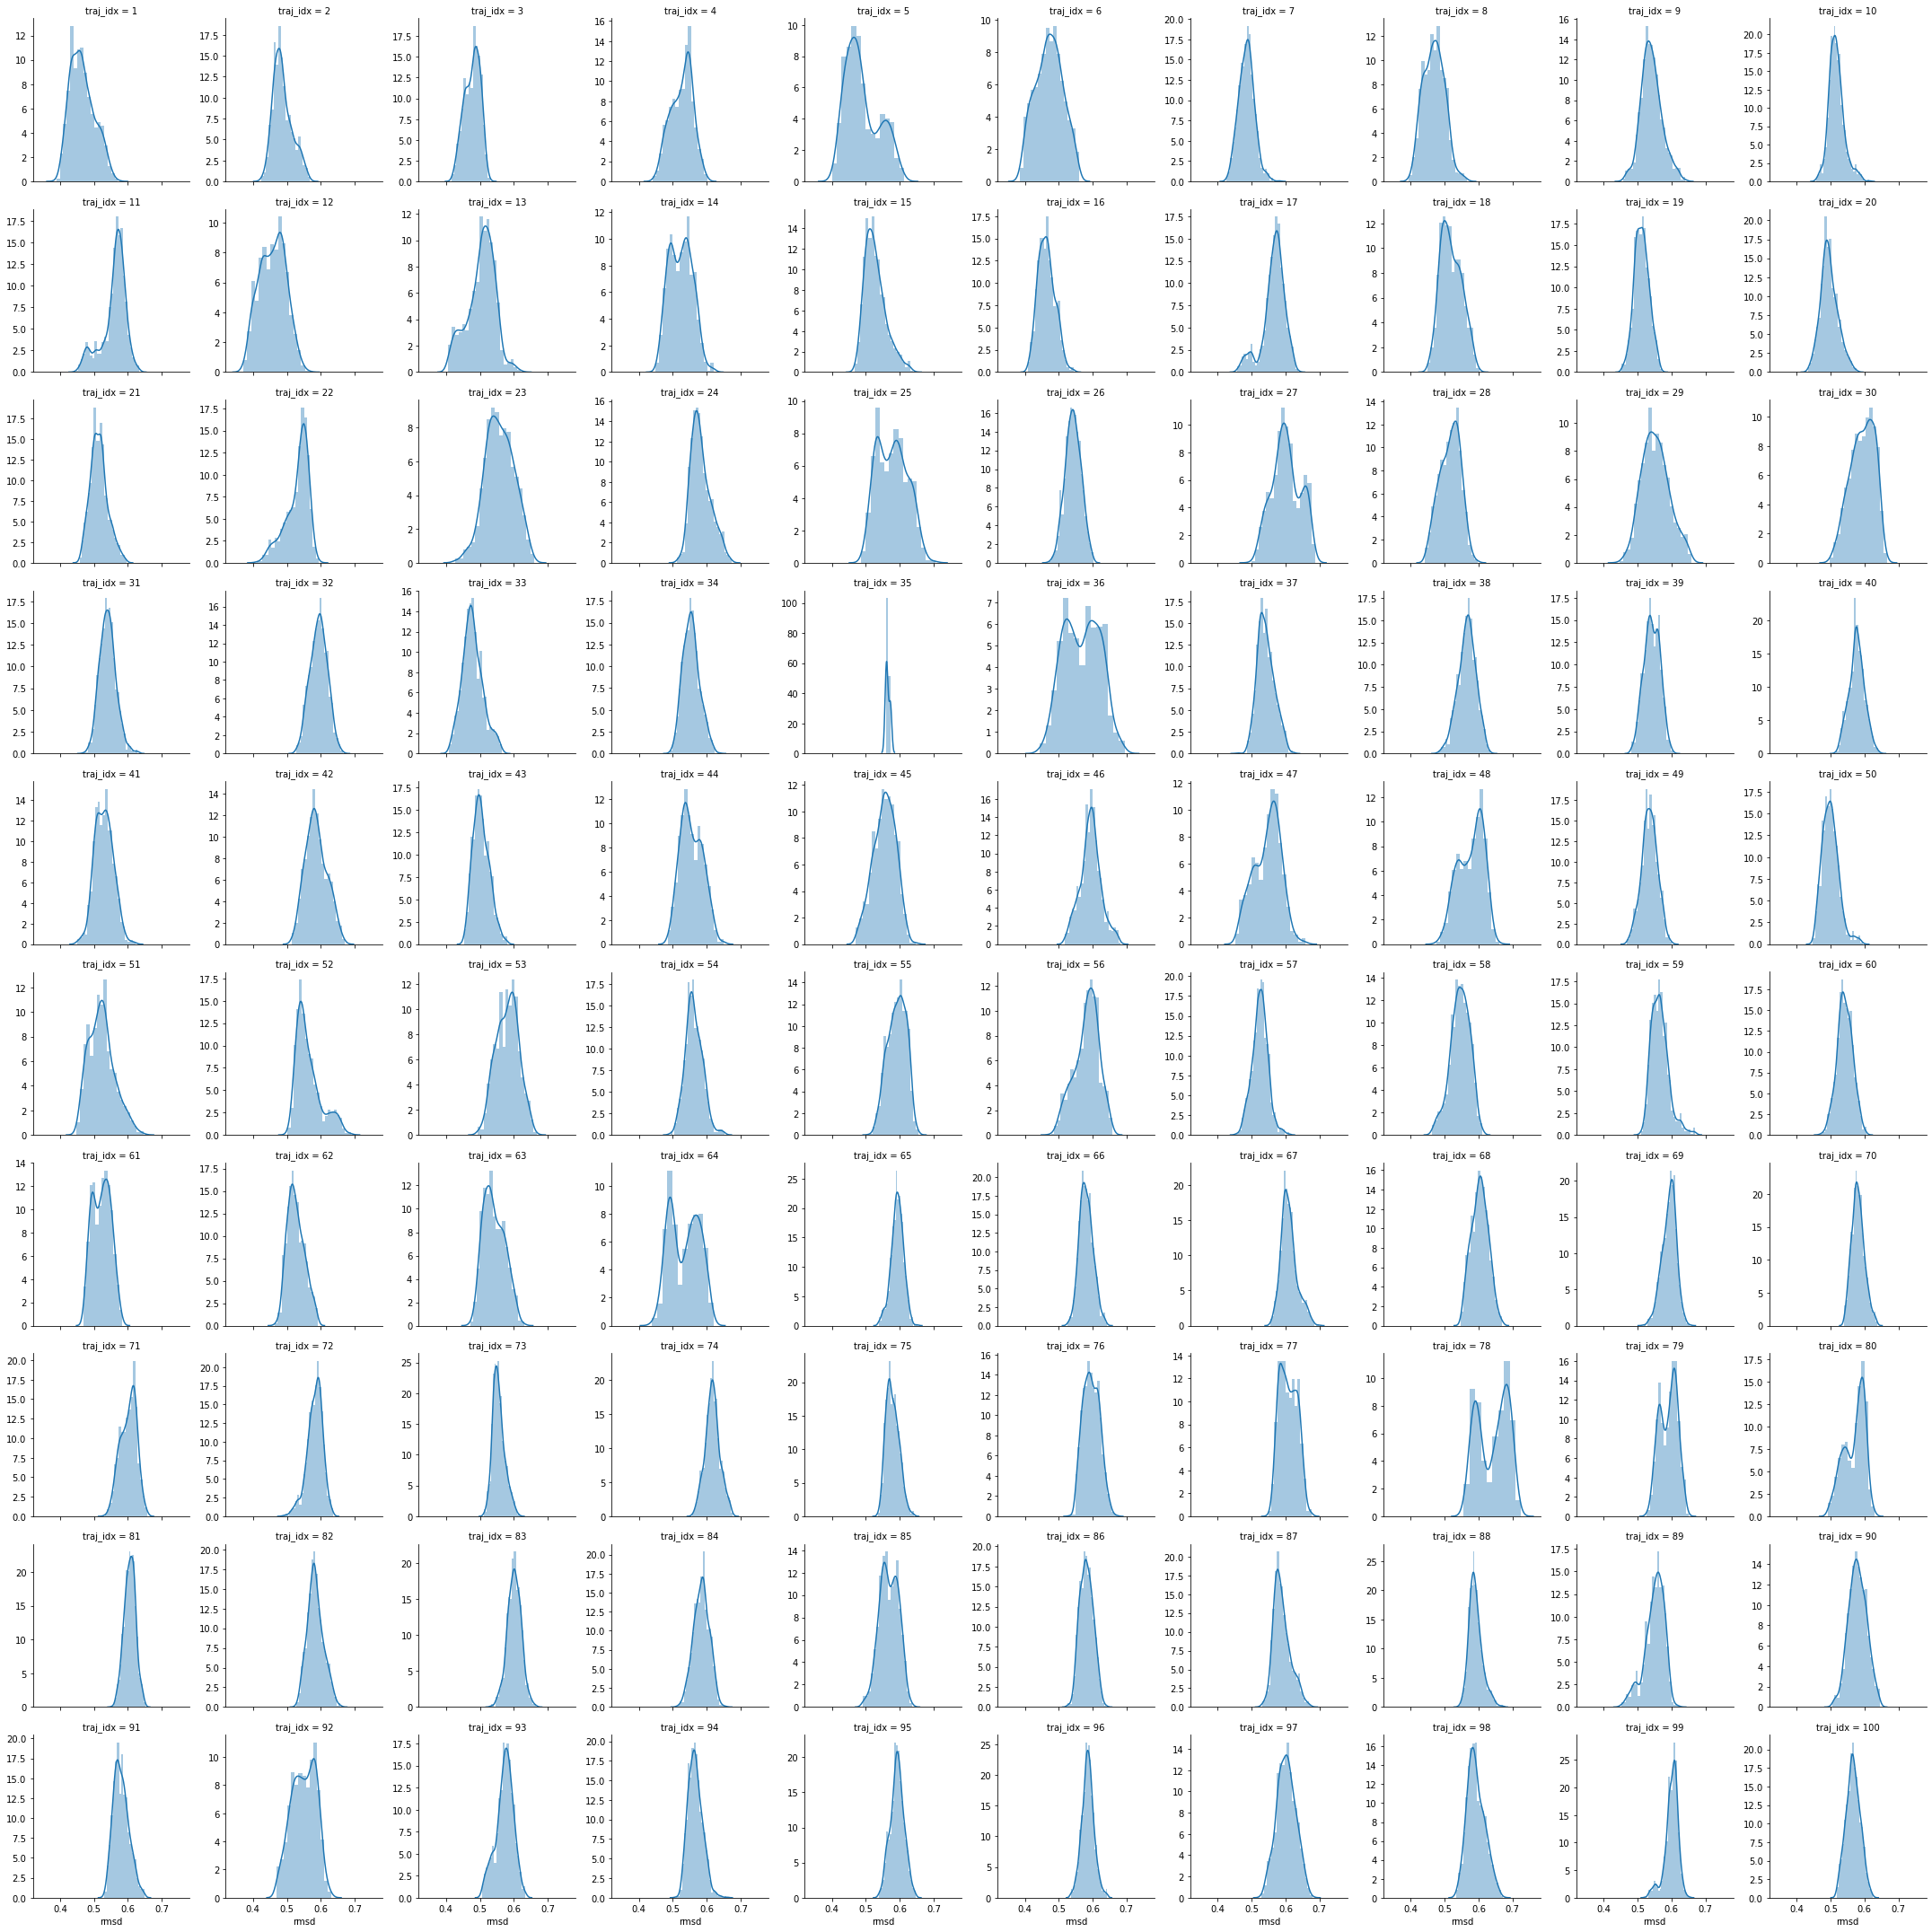

In [31]:
g = sns.FacetGrid(df, col='traj_idx', col_wrap=10, sharey=False)
g.map(sns.distplot, 'rmsd')

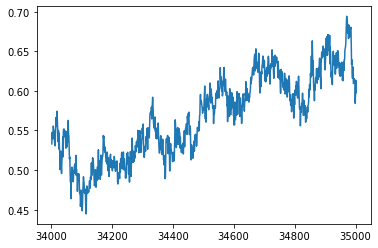

In [45]:
plt.plot(df.loc[df.traj_idx==36, 'rmsd'])

In [39]:
traj = md.load('/Volumes/JGI/AAHD/round_1/78ns/100ns-production-stripped.xtc', 
               top='./data/2agy_final_min-stripped_1frame.pdb', stride=10)

In [44]:
traj.superpose(reference=traj).save('outputs/78_aligned.xtc')

In [51]:

df.groupby('traj_idx').agg(np.var).reset_index().sort_values(by='rmsd', ascending=False)

,traj_idx,rmsd
35,36,2765.905214
4,5,2442.735271
77,78,2006.907598
24,25,1930.599094
63,64,1848.157094
22,23,1775.911285
26,27,1666.614984
12,13,1622.789341
28,29,1617.154063
5,6,1575.961181
